In [2]:
import csv

file = open("./weather.csv", "r", encoding = "UTF-8")
data = csv.reader(file)

next(data) #헤더 건너뛰기
initData = next(data)
highest = float(initData[4])
lowest = float(initData[3])
dailyTempRange = highest - lowest
highestDate = initData[0]
lowestDate = initData[0]
biggestRange = initData[0]

for row in data: #한 줄씩 읽어오기
    tempRange = float(row[4])-float(row[3])
    # print(tempRange)
    if highest < float(row[4]):
        highest = float(row[4])
        highestDate = row[0]
    if lowest > float(row[3]):
        lowest = float(row[3])
        lowestDate = row[0]
    if dailyTempRange < tempRange:
        dailyTempRange = tempRange
        biggestRange = row[0]

file.close()

print("일교차가 가장 큰 날")
print(biggestRange)
print("최저기온이 가장 낮은 날")
print(lowestDate)
print("최고기온이 가장 높은 날")
print(highestDate)

일교차가 가장 큰 날
2021-04-21
최저기온이 가장 낮은 날
2021-01-08
최고기온이 가장 높은 날
2021-07-24


[-3.9]


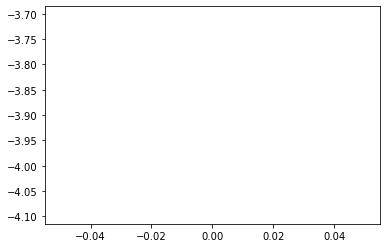

In [1]:
#기온 시각화
import csv
import numpy as np
import matplotlib.pyplot as plt

file = open("./weather.csv", "r", encoding = "UTF-8")
data = csv.reader(file)

next(data) #헤더 건너뛰기
result = []
for row in data:
    if row[-1] != ' ':
        if row[0].split('-')[1] == '12' and row[0].split('-')[2] =='31':
            result.append(float(row[-1]))
            
print(result)
plt.plot(result)
plt.show()

file.close()

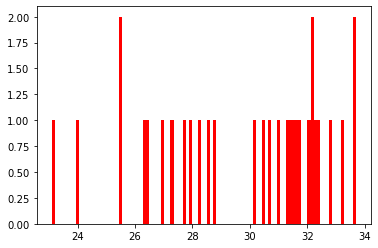

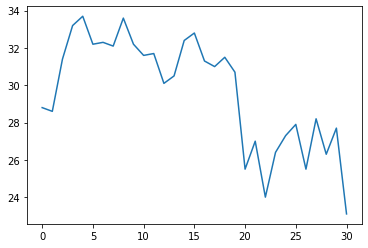

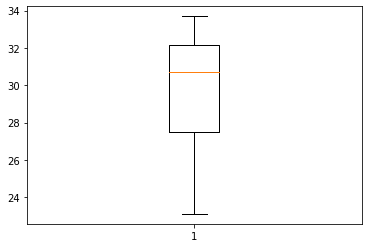

In [6]:
#기온 시각화2-히스토그램
import csv
import numpy as np
import matplotlib.pyplot as plt

file = open("./weather.csv", "r", encoding = "UTF-8")
data = csv.reader(file)

next(data) #헤더 건너뛰기
aug = []
for row in data:
    month = row[0].split('-')[1]
    if row[-1] != ' ':
        if month == '08':
            aug.append(float(row[-1]))

plt.hist(aug, bins=100, color='r')
plt.show()
            
plt.plot(aug)
plt.show()

#상자 그래프
plt.boxplot(aug)
plt.show()

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family = 'AppleGothic')

f = open('seoul.csv','r',encoding = 'cp949')
data = csv.reader(f)
next(data)

week_temp = []
sum = 0
count = 0


for row in data:
    day = int(row[0].split('-')[2])
    if day%7 != 0:
        sum += float(row[4])-float(row[3])
        if day == 31:
            week_temp.append(sum)
    else:
        week_temp.append(sum)
        sum = 0
    
maxindex = 0
maxvalue = 0
for i,value in enumerate(week_temp):
    if value >= maxvalue:
        maxvalue = value
        maxindex = i

resultday1 = maxindex*7+1
resultday2 = maxindex*7+7

print('Max Week = 5/',resultday1, ' ~ ','5/',resultday2)

In [9]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family = 'AppleGothic')

f = open('weather.csv','r')
data = csv.reader(f)
next(data)

week_temp = []
sum = 0
count = 0


for row in data:
    day = int(row[0].split('-')[2])
    if day%7 != 0:
        sum += float(row[4])-float(row[3])
        if day == 31:
            week_temp.append(sum)
    else:
        week_temp.append(sum)
        sum = 0
    
maxindex = 0
maxvalue = 0
for i,value in enumerate(week_temp):
    if value >= maxvalue:
        maxvalue = value
        maxindex = i

resultday1 = maxindex*7+1
resultday2 = maxindex*7+7

print('Max Week = 5/',resultday1, ' ~ ','5/',resultday2)
    

Max Week = 5/ 99  ~  5/ 105


In [4]:
import csv

file = open("./subway.csv", "r", encoding="UTF8")
data = csv.reader(file)
next(data)
user = {}
userDic = {}
line = {}
lineNum = ""
tmp = 0

for row in data: #한 줄씩 읽어오기
    if (row[1], row[2]) in user:
        user[(row[1], row[2])] += (int(row[3]) + int(row[4]))
    else:
        user[(row[1], row[2])] = int(row[3]) + int(row[4])

user = sorted(user.items())

for i in user:
    userDic[i[0]] = i[1]

while True:
    if len(userDic) == 0:
        break

    for key, value in userDic.items():
        if tmp == 0:
            tmp = 1
            lineNum = key[0]
        if lineNum == key[0]:
            line[key[1]] = value
        else:
            continue
    tmp = 0

    for key in line.keys():
        del(userDic[(lineNum,key)])

    result = sorted(line.items(), key=(lambda x:x[1]), reverse = True)
    print("==========="+ lineNum +"===========")
    print("이용객이 가장 많은 역 순위")
    print("1. {0}({1}명)".format(result[0][0], result[0][1]))
    print("2. {0}({1}명)".format(result[1][0], result[1][1]))
    print("3. {0}({1}명)".format(result[2][0], result[2][1]))
    print("이용객이 가장 적은 역 순위")
    print("1. {0}({1}명)".format(result[-1][0], result[-1][1]))
    print("2. {0}({1}명)".format(result[-2][0], result[-2][1]))
    print("3. {0}({1}명)".format(result[-3][0], result[-3][1]))
    print()

    lineNum = ""
    line.clear()

===========1호선===========
이용객이 가장 많은 역 순위
1. 서울역(2324817명)
2. 종각(1721553명)
3. 종로3가(1267098명)
이용객이 가장 적은 역 순위
1. 동묘앞(477540명)
2. 동대문(598363명)
3. 신설동(715381명)

===========2호선===========
이용객이 가장 많은 역 순위
1. 강남(4364436명)
2. 잠실(송파구청)(3927922명)
3. 신림(3412199명)
이용객이 가장 적은 역 순위
1. 도림천(73495명)
2. 신답(92368명)
3. 용두(동대문구청)(130447명)

===========3호선===========
이용객이 가장 많은 역 순위
1. 고속터미널(2393331명)
2. 양재(서초구청)(2098334명)
3. 연신내(1933410명)
이용객이 가장 적은 역 순위
1. 충무로(24명)
2. 학여울(110564명)
3. 무악재(208517명)

===========4호선===========
이용객이 가장 많은 역 순위
1. 수유(강북구청)(1852687명)
2. 혜화(1806760명)
3. 쌍문(1523740명)
이용객이 가장 적은 역 순위
1. 남태령(61860명)
2. 동작(현충원)(78275명)
3. 삼각지(280235명)

===========5호선===========
이용객이 가장 많은 역 순위
1. 광화문(세종문화회관)(1585762명)
2. 까치산(1536307명)
3. 화곡(1474473명)
이용객이 가장 적은 역 순위
1. 동대문역사문화공원(DDP)(158553명)
2. 오금(196258명)
3. 영등포구청(198914명)

===========6호선===========
이용객이 가장 많은 역 순위
1. 응암(943562명)
2. 공덕(934075명)
3. 망원(810198명)
이용객이 가장 적은 역 순위
1. 신내(8명)
2. 연신내(26명)
3. 버티고개(106297명)

===========7호선===========
이용객이 가장 